<a href="https://colab.research.google.com/github/chrispark962/chrispark962.github.io/blob/main/bay_area_sports_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # library for data analysis
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

wikiurl_giants = "https://en.wikipedia.org/wiki/List_of_San_Francisco_Giants_seasons"
wikiurl_49ers = "https://en.wikipedia.org/wiki/List_of_San_Francisco_49ers_seasons"
wikiurl_sharks = "https://en.wikipedia.org/wiki/List_of_San_Jose_Sharks_seasons"
wikiurl_warriors = "https://en.wikipedia.org/wiki/List_of_Golden_State_Warriors_seasons"

response_giants = requests.get(wikiurl_giants)
print(response_giants.status_code)

response_49ers = requests.get(wikiurl_49ers)
print(response_49ers.status_code)

response_sharks = requests.get(wikiurl_sharks)
print(response_sharks.status_code)

response_warriors = requests.get(wikiurl_warriors)
print(response_warriors.status_code)

soup_giants = BeautifulSoup(response_giants.text, 'html.parser')
giants_table = soup_giants.find_all('table')
df_giants =pd.read_html(str(giants_table))
df_giants =pd.DataFrame(df_giants[1])

soup_49ers = BeautifulSoup(response_49ers.text, 'html.parser')
fortyniners_table = soup_49ers.find_all('table')
df_49ers =pd.read_html(str(fortyniners_table))
df_49ers =pd.DataFrame(df_49ers[1])

soup_sharks = BeautifulSoup(response_sharks.text, 'html.parser')
sharks_table = soup_sharks.find_all('table')
df_sharks =pd.read_html(str(sharks_table))
df_sharks =pd.DataFrame(df_sharks[2])

soup_warriors = BeautifulSoup(response_warriors.text, 'html.parser')
warriors_table = soup_warriors.find_all('table')
df_warriors =pd.read_html(str(warriors_table))
df_warriors =pd.DataFrame(df_warriors[2])


200
200
200
200


In [2]:
# df_giants.head()

In [3]:
# df_giants.tail()

In [4]:
df_giants = df_giants[df_giants['Team season'].str.contains('New')==False ]

In [5]:
df_giants = df_giants[['Team season', 'Win%']]

In [6]:
# df_giants

In [7]:
df_49ers['win_percentage'] = df_49ers['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W']/(df_49ers['.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W']+df_49ers['L'])

df_49ers = df_49ers[['Season', 'win_percentage']]

In [8]:
# df_sharks.columns

In [9]:
df_sharks.columns = ['_'.join(col) for col in df_sharks.columns]

In [10]:
# df_sharks.head()

In [11]:
# df_sharks.columns

In [12]:
# df_sharks['Regular season[1]_W']

In [13]:
df_sharks = df_sharks[df_sharks['Regular season[1]_W'].str.contains('Season')==False ]

In [14]:
df_sharks['Regular season[1]_W'] = pd.to_numeric(df_sharks['Regular season[1]_W'])

df_sharks['Regular season[1]_L'] = pd.to_numeric(df_sharks['Regular season[1]_L'])

In [15]:
df_sharks['win_percentage'] = df_sharks['Regular season[1]_W'] / (df_sharks['Regular season[1]_W'] + df_sharks['Regular season[1]_L'])

In [16]:
df_sharks = df_sharks[['Season_Season', 'win_percentage']]

In [17]:
df_sharks['season'] = df_sharks['Season_Season'].astype(str).str[0:4]

<ipython-input-17-df7356ad335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks['season'] = df_sharks['Season_Season'].astype(str).str[0:4]


In [18]:
df_sharks = df_sharks[['season', 'win_percentage']]

In [19]:
df_warriors = df_warriors[['Season', 'Win%']]

In [20]:
df_warriors['season_'] = df_warriors['Season'].astype(str).str[0:4]

<ipython-input-20-675077727ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warriors['season_'] = df_warriors['Season'].astype(str).str[0:4]


In [21]:
df_warriors = df_warriors[['season_', 'Win%']]

In [22]:
df_warriors = df_warriors[df_warriors['Win%'].str.contains('Warriors')==False ]

In [23]:
df_warriors

,season_,Win%
1,1946,.583
2,1947,.563
3,1948,.467
4,1949,.382
5,1950,.606
...,...,...
75,2018,.695
76,2019,.231
77,2020,.542
78,2021,.646


In [24]:
df_giants = df_giants[df_giants['Win%'].str.contains('Giants')==False ]

In [25]:
df_giants['Win%'] = df_giants['Win%'].astype(float)

<ipython-input-25-d67a718ce40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_giants['Win%'] = df_giants['Win%'].astype(float)


In [26]:
df_giants['season'] = df_giants["Team season"].astype(int)

<ipython-input-26-bea68fcec224>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_giants['season'] = df_giants["Team season"].astype(int)


In [27]:
df_giants = df_giants[['season', 'Win%']]

In [28]:
df_giants

,season,Win%
1,1883,0.479
2,1884,0.554
4,1885,0.759
5,1886,0.630
6,1887,0.553
...,...,...
140,2019,0.475
141,2020,0.483
142,2021,0.660
143,2022,0.500


In [29]:
df_warriors['season'] = df_warriors['season_'].astype(int)

In [30]:
df_warriors = df_warriors[['season', 'Win%']]

In [31]:
df_warriors['Win%'] = df_warriors['Win%'].astype(float)

<ipython-input-31-4f28bfdc02e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_warriors['Win%'] = df_warriors['Win%'].astype(float)


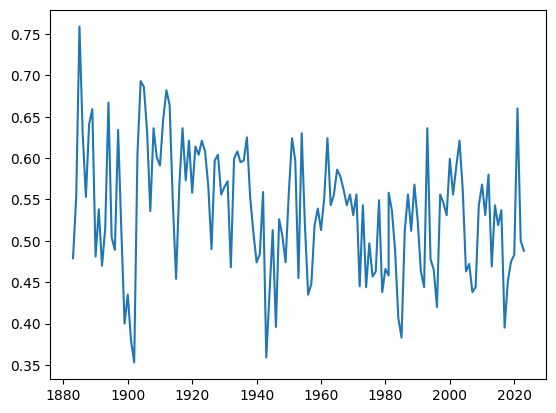

In [32]:
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(df_giants['season'], df_giants['Win%'])

# Show the plot
plt.show()

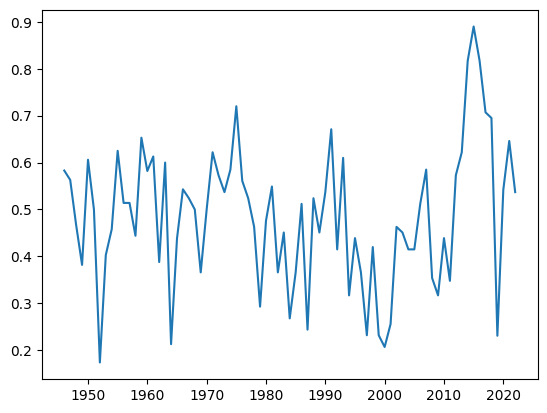

In [33]:
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(df_warriors['season'], df_warriors['Win%'])

# Show the plot
plt.show()

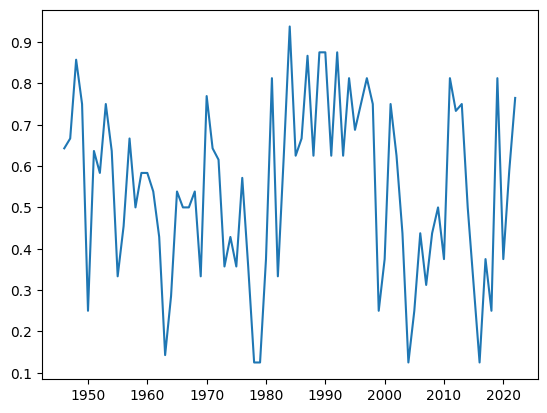

In [34]:
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(df_49ers['Season'], df_49ers['win_percentage'])

# Show the plot
plt.show()

In [35]:
df_sharks = df_sharks.iloc[:-1 ,:]

In [36]:
df_sharks.season = df_sharks.season.astype(int)

<ipython-input-36-1d81e653cf20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sharks.season = df_sharks.season.astype(int)


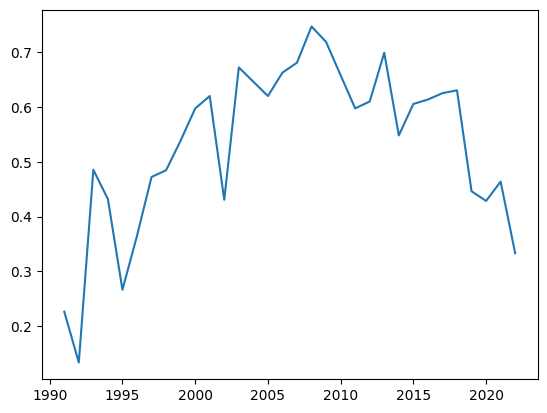

In [37]:
import matplotlib.pyplot as plt

# Create a line plot
plt.plot(df_sharks['season'], df_sharks['win_percentage'])

# Show the plot
plt.show()

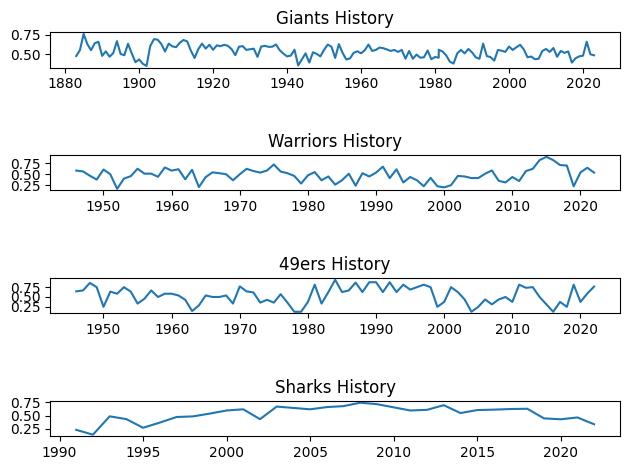

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math

figure, axis = plt.subplots(4, 1)

axis[0].plot(df_giants['season'], df_giants['Win%'])
axis[0].set_title("Giants History")

axis[1].plot(df_warriors['season'], df_warriors['Win%'])
axis[1].set_title("Warriors History")

axis[2].plot(df_49ers['Season'], df_49ers['win_percentage'])
axis[2].set_title("49ers History")

axis[3].plot(df_sharks['season'], df_sharks['win_percentage'])
axis[3].set_title("Sharks History")

plt.tight_layout(h_pad=3.0)  # Adjust the value of h_pad to control the vertical spacing

plt.show()

In [39]:
# df['MA'] = df.rolling(window=5).mean()
df_giants['10_year_moving_average'] = df_giants['Win%'].rolling(window = 10).mean()

In [40]:
df_giants = df_giants[df_giants['season'] >= 1950]

In [41]:
  df_49ers['10_year_moving_average'] = df_49ers['win_percentage'].rolling(window = 10).mean()

In [42]:
df_49ers = df_49ers[df_49ers['Season'] >= 1950]

In [43]:
df_49ers = df_49ers.rename(columns = {'Season':'season'})

In [44]:
df_warriors['10_year_moving_average'] = df_warriors['Win%'].rolling(window = 10).mean()

In [45]:
df_warriors = df_warriors[df_warriors['season'] >= 1950]

In [46]:
df_warriors

,season,Win%,10_year_moving_average
5,1950,0.606,NaN
6,1951,0.500,NaN
7,1952,0.174,NaN
8,1953,0.403,NaN
9,1954,0.458,NaN
...,...,...,...
75,2018,0.695,0.6225
76,2019,0.231,0.6139
77,2020,0.542,0.6242
78,2021,0.646,0.6540


In [47]:
df_49ers

,season,win_percentage,10_year_moving_average
4,1950,0.250000,NaN
5,1951,0.636364,NaN
6,1952,0.583333,NaN
7,1953,0.750000,NaN
8,1954,0.636364,NaN
...,...,...,...
72,2018,0.250000,0.473333
73,2019,0.812500,0.504583
74,2020,0.375000,0.504583
75,2021,0.588235,0.482157


In [48]:
df_giants = df_giants[df_giants['season'] != 2023]

In [49]:
df_giants

,season,Win%,10_year_moving_average
69,1950,0.558,0.4810
70,1951,0.624,0.4950
71,1952,0.597,0.4988
72,1953,0.455,0.5084
73,1954,0.630,0.5279
...,...,...,...
139,2018,0.451,0.5136
140,2019,0.475,0.5068
141,2020,0.483,0.4983
142,2021,0.660,0.5112


In [50]:
# import matplotlib.pyplot as plt
# import numpy as np

# # create data
# x = [1,2,3,4,5]
# y = [3,3,3,3,3]

# # plot lines
# plt.plot(x, y, label = "line 1", linestyle="-")
# plt.plot(y, x, label = "line 2", linestyle="--")
# plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
# plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
# plt.legend()
# plt.show()

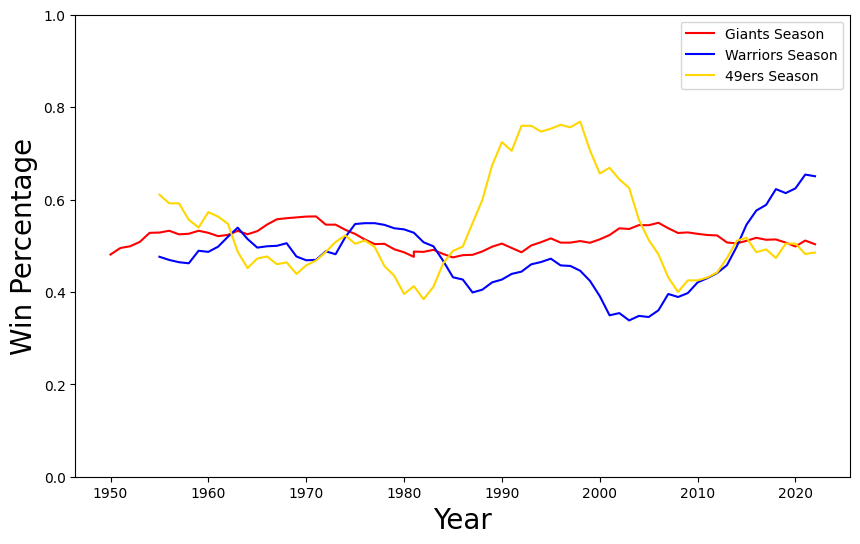

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_giants['season'], df_giants['10_year_moving_average'], label = 'Giants Season', color = 'red')
plt.plot(df_warriors['season'], df_warriors['10_year_moving_average'], label = 'Warriors Season', color = 'blue')
plt.plot(df_49ers['season'], df_49ers['10_year_moving_average'], label = '49ers Season', color = 'gold')
plt.legend()
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Win Percentage", fontsize = 20)
plt.ylim(0,1)
plt.show()